<font color='purple'><center><h1>Importing the libraries</h1></center></font>

In [1]:
# Libraries that are data preprocessing and data visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
import warnings
warnings.filterwarnings('ignore')

#while plotting the plots we will get some warnings ..to ignore them I am using this library

In [87]:
# Libraries that are required for machine learning models

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<font color='gold'><center><h1>Loading the dataset<center></h1></font>

In [71]:
columns = ['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax','prp', 'erp']

df = pd.read_csv('machine.csv', names = columns, header = None)

<font color='maroon'><center><h3>Abbrevations used in the dataset</center></h3></font>

<font color='purple'>
<ol>
    <li>    Vendor Name:30 unique names    </li>
    <li>    Model Name: Many unique symbols    </li>
    <li>    MYCT: Machine cycle time in nanoseconds (Integer)    </li>
    <li>    MMIN: Minimum main memory in kilobytes (Integer)    </li>
    <li>    MMAX: Maximum main memory in kilobytes (Integer)    </li>
    <li>    CACH: Cache memory in kilobytes (Integer)    </li>
    <li>    CHMIN: Minimum channels in units (Integer)    </li>
    <li>    CHMAX: Maximum channels in units (Integer)    </li>
    <li>    PRP: Published relative performance (Integer)    </li>
    <li>    ERP: Estimated relative performance from the original article (Integer)    </li>
</ol>
</font>

<font color='maroon'><center><h3>Information related to dataset</center></h3></font>

<font color = #538b01>
<ul>  
       <li><p>Cycle time is the time, usually measured in nanosecond s, between the start of one random access memory ( RAM ) to another</p></li>
       <li>Main memory is also called RAM</li>
       <li>MMIN:- Minimum amount of main memory that your system supports</li>
       <li>MMAX:- Maximum amount of main memory that your system supports</li>
       <li><p>Cache memory is an extremely fast memory type that acts as a buffer between RAM and the CPU. 
        Cache memory is used to reduce the average time to access data from the Main memory.
        It stores program instructions and data that are used repeatedly in the operation of 
        programs or information that the CPU is likely to need next.</p></li>
        <li><p>A channel provides an independent data and control path between I/O devices and memory. 
        Early systems had up to 16 channels; the today's largest mainframe machines can have over 1000 channels.
        Channels connect to control units. A control unit contains logic to work with a particular type of I/O device.</p></li>
     
</ul>
</font>

 <font color='blue'><h1><center>Exploring the dataset</center></h1></font>

In [3]:
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   model   209 non-null    object
 2   myct    209 non-null    int64 
 3   mmin    209 non-null    int64 
 4   mmax    209 non-null    int64 
 5   cach    209 non-null    int64 
 6   chmin   209 non-null    int64 
 7   chmax   209 non-null    int64 
 8   prp     209 non-null    int64 
 9   erp     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
df.isna().any()

#Checking if any null values present in the dataset

vendor    False
model     False
myct      False
mmin      False
mmax      False
cach      False
chmin     False
chmax     False
prp       False
erp       False
dtype: bool

<font color = 'burgundy'><p> None of the feature have null values </p></font> 

In [6]:
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


From the above description of the data we can say that some values are largely deviated from their mean that is why the standard deviation is more and we can observe deviation by seeing 75% values and maximum values ..i.e.,how much difference between them.

In [7]:
df['model'].value_counts()

v8595:ii            1
4341-11             1
1636-1              1
3081:d              1
eclipse:mv/10000    1
                   ..
m80/32              1
600                 1
dps:8/52            1
dps:6/92            1
80/3                1
Name: model, Length: 209, dtype: int64

<font color = 'peach'><p>As we can see above that the number of models is equal to number of instances  i.e., every instance has a different model....So, I will not consider this feature in my Machine Learning model as it will not show any impact</p></font>

In [89]:
df['vendor'].value_counts()

ibm             32
nas             19
honeywell       13
ncr             13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
harris           7
hp               7
dg               7
ipl              6
c.r.d            6
magnuson         6
dec              6
cambex           5
formation        5
prime            5
nixdorf          3
gould            3
perkin-elmer     3
apollo           2
wang             2
bti              2
basf             2
adviser          1
microdata        1
sratus           1
four-phase       1
Name: vendor, dtype: int64

 <font color='peach'><p>Here in the case of vendor also I am having a lot of unique values ...So, intially I will not consider them later I will consider them and will check the model performance whether it improved performance or not..If it's not I will remove this feature also</p></font>

<font color = 'purple'><center><h1>Visualization</h1></center></font>

<AxesSubplot:>

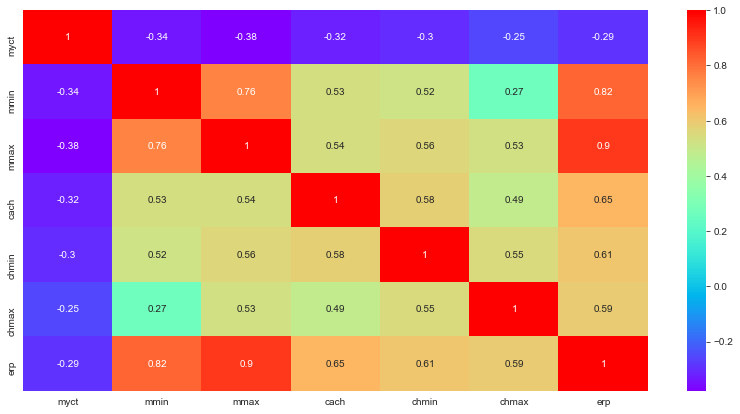

In [132]:
#Plotting the heat map to know the coefficient of correlation(r)

plt.figure(figsize = (14,7))
sns.heatmap(df[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'erp']].corr(), annot = True, cmap = 'rainbow')

<Figure size 2160x1080 with 0 Axes>

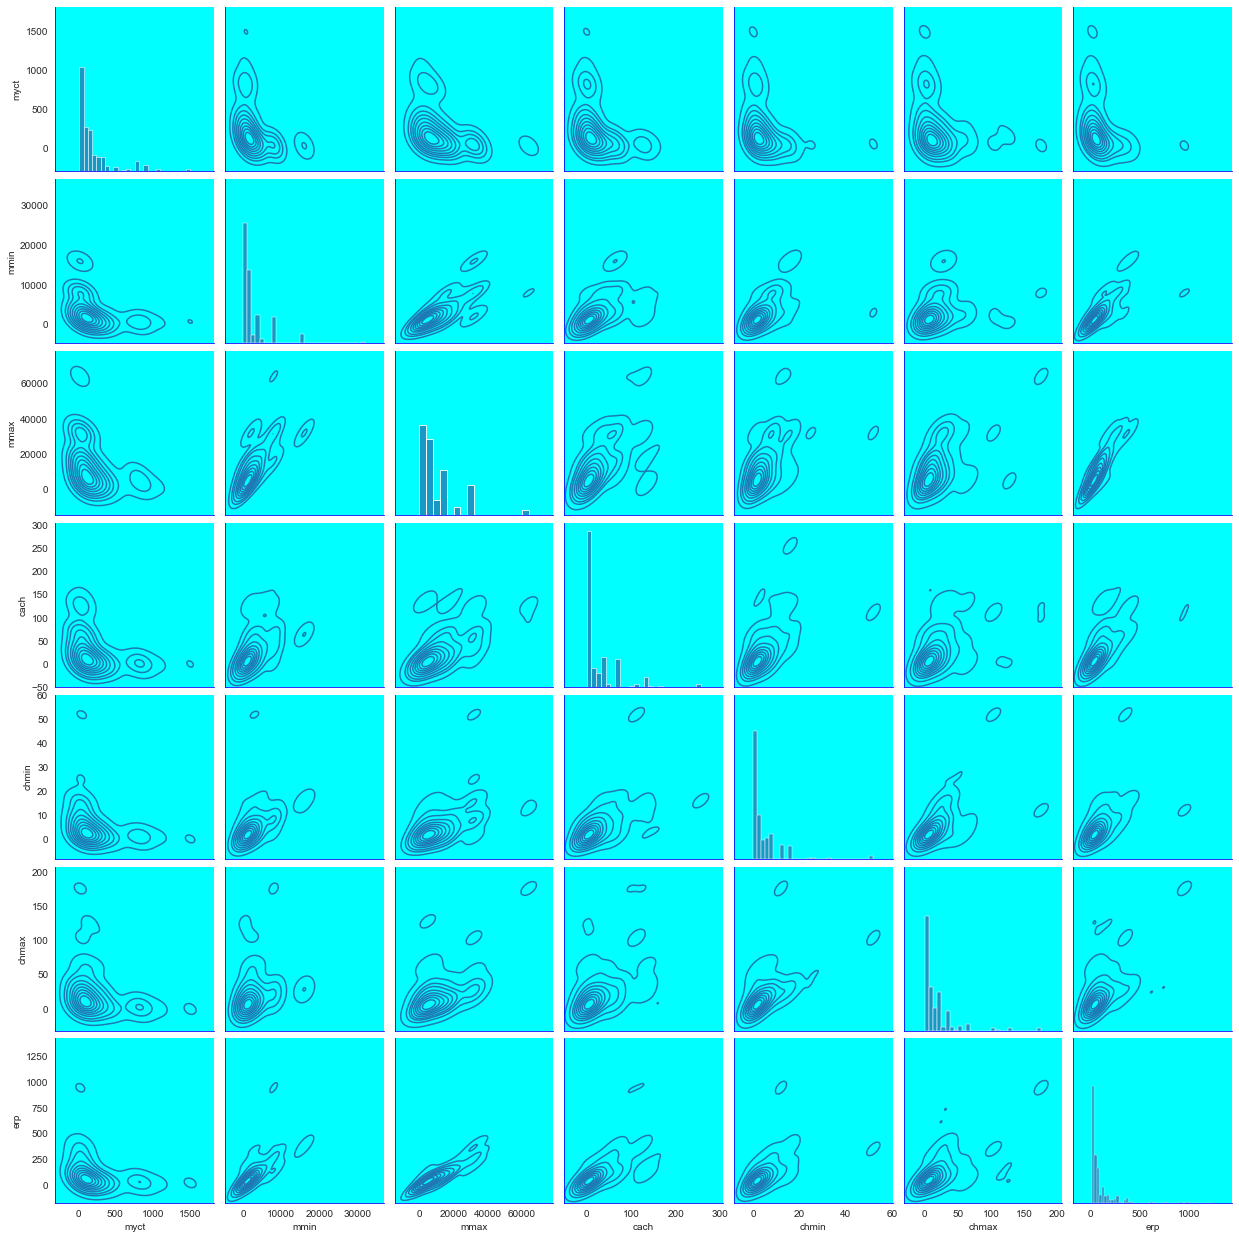

In [9]:
sns.set_style('white', rc = {'axes.facecolor': 'cyan','axes.edgecolor': 'blue'})

plt.figure(figsize = (30,15))

sns.pairplot(df.drop(columns = ['vendor', 'model', 'prp'], axis = 1), kind = 'kde', diag_kind = 'hist')

plt.show()

<Figure size 2160x1080 with 0 Axes>

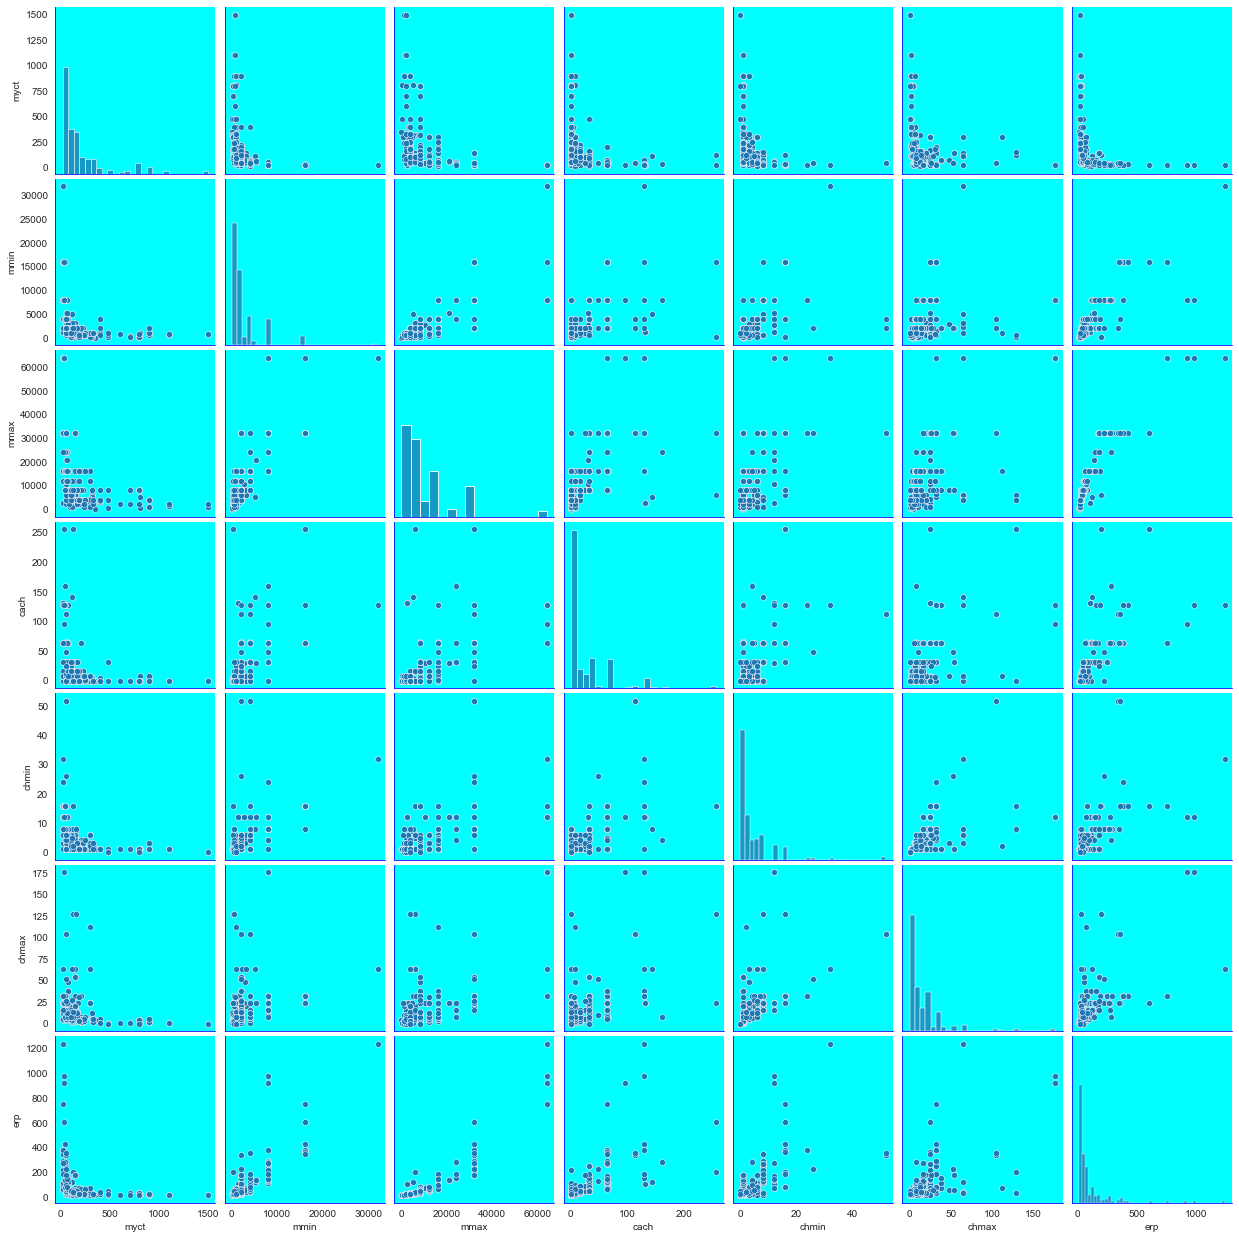

In [13]:
sns.set_style('white', rc = {'axes.facecolor': 'cyan','axes.edgecolor': 'blue'})

plt.figure(figsize = (30,15))

sns.pairplot(df.drop(columns = ['vendor', 'model', 'prp'], axis = 1), kind = 'scatter', diag_kind = 'hist')

plt.show()

 <font color = 'gold'><center><h1>Applying ML Algorithms </h1></center></font>

In [105]:
X = df.drop(columns = ['vendor', 'model', 'prp', 'erp'], axis = 1)
y = df['erp']

#Here I am droping the vendor and will see in the later phase whether it will improve performance or not

In [91]:
X.shape

(209, 6)

In [92]:
y.shape

(209,)

In [93]:
X.head()

,myct,mmin,mmax,cach,chmin,chmax
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Dividing the data into training and testing set

In [116]:

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)

#print(y_train, pred_train)

print("Mean Squared Error on Training data:{:.4f}".format(mean_squared_error(y_train, pred_train)))
print("R2_Score on Training data:{:.4f}".format(r2_score(y_train, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(y_train, pred_train)))


pred_test = lr.predict(X_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(y_test, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(y_test, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(y_test, pred_test)))


print(f"\nIntercept is:{lr.intercept_}")
print(f"Coefficients are:{lr.coef_}")

# Here I am training my model without applying scaler to the data

Mean Squared Error on Training data:1402.3308
R2_Score on Training data:0.9127
Mean Absolute Error on training data:25.4570

Mean Squared Error on test data:6493.1105
R2_Score on test data:0.8792
Mean Absolute Error on test data:37.1756

Intercept is:-53.63232836121368
Coefficients are:[ 0.05263209  0.00891649  0.00694417  0.61988072 -0.0407375   0.89206874]


<font color = 'peach'><p>Here I have applied the multiple linear regression model without scaling the values the reason why mean_squared_error is very high as the data have some outliers in it</p></font>

In [117]:

scaler = StandardScaler() 

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_train_y = scaler.fit_transform(y_train.values.reshape(-1,1))

scaled_data_test = scaler.fit_transform(X_test)
scaled_data_test_y = scaler.fit_transform(y_test.values.reshape(-1,1))


scaled_data_train = pd.DataFrame(data = scaled_data_train, columns = ['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax'])
scaled_data_train_y = pd.DataFrame(data = scaled_data_train_y, columns = ['erp'])


scaled_data_test = pd.DataFrame(data = scaled_data_test, columns = ['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax'])
scaled_data_test_y = pd.DataFrame(data = scaled_data_test_y, columns = ['erp'])

scaled_data_train.head()

#Applying the standard scaler to data

,myct,mmin,mmax,cach,chmin,chmax
0,-0.624967,1.551358,0.419613,0.176130,0.653103,-0.055738
1,-0.677359,3.930080,1.898340,0.948268,0.653103,0.285849
2,-0.662390,1.551358,4.855794,2.492545,1.348913,6.776010
3,-0.381716,-0.530024,-0.689432,-0.596009,-0.216659,0.285849
4,-0.662390,3.930080,1.898340,5.581098,2.044723,0.285849


<font color ='peach'><p> Here in the above cell I have scaled all the training and testing data separately to avoid data leakage 
and I have used Standard Scaler to have data centered around mean 0 with standard deviation 1</p></font>

In [118]:
scaled_data_test.shape

(42, 6)

In [119]:
scaled_data_test_y.shape

(42, 1)

In [120]:

lr = LinearRegression()

lr.fit(scaled_data_train, scaled_data_train_y)

pred_train = lr.predict(scaled_data_train)

#print(y_train, pred_train)

print("\nMean Squared Error on training data:{:.4f}".format(mean_squared_error(scaled_data_train_y, pred_train)))
print("R2_Score on training data:{:.4f}".format(r2_score(scaled_data_train_y, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(scaled_data_train_y, pred_train)))

pred_test = lr.predict(scaled_data_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(scaled_data_test_y, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(scaled_data_test_y, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(scaled_data_test_y, pred_test)))

print(f"\nIntercept is:{lr.intercept_}")
print(f"Coefficients are:{lr.coef_}")

#Applying the multiple_linear_regression model on scaled data


Mean Squared Error on training data:0.0873
R2_Score on training data:0.9127
Mean Absolute Error on training data:0.2009

Mean Squared Error on test data:0.0847
R2_Score on test data:0.9153
Mean Absolute Error on test data:0.2341

Intercept is:[-1.40108408e-17]
Coefficients are:[[ 0.11098194  0.23663681  0.59291798  0.20272399 -0.00184802  0.16486507]]


<font color ='blue'><h4>Here I am getting very good score and MSE after scaling my features.Now, I will try to remove outliers and
will check the score</h4></font>

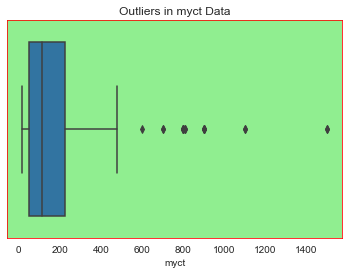

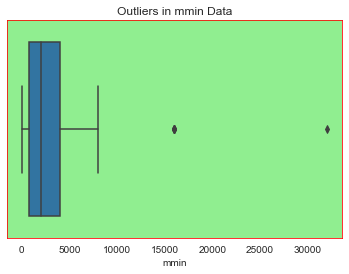

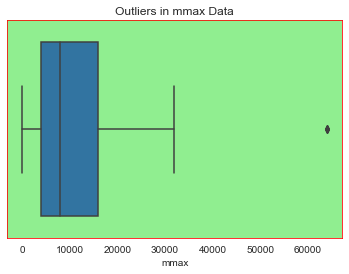

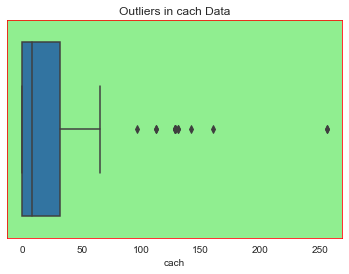

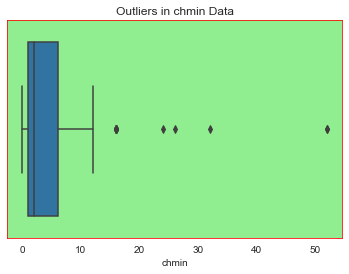

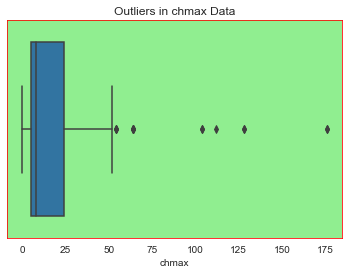

In [123]:
# Plotting the box plot for knowing the outliers

sns.set_style('white', rc = {'axes.facecolor': 'lightgreen','axes.edgecolor': 'red'})

columns = "myct mmin mmax cach chmin chmax".split()

for  col in columns:
     plt.figure()
     plt.title(f"Outliers in {col} Data")
     sns.boxplot(df[col])

<font color='blue'><h4>As we can see in the above boxplot there are points that are located outside of whiskers which 
indicates the points that are located after 1.5 * IQR which are generally classified as outliers
</h4></font>

In [148]:
df2 = df.copy()

#Copying the dataset

In [149]:
first_quartile = df2[['myct', 'cach', 'chmin', 'chmax']].quantile(.25)
third_quartile = df2[['myct', 'cach', 'chmin', 'chmax']].quantile(.75)
IQR = third_quartile - first_quartile


first_quartile_m = df2[['mmin', 'mmax']].quantile(.25)
third_quartile_m = df2[['mmin', 'mmax']].quantile(.75)
IQR_m = third_quartile_m - first_quartile_m

#Computing the values that are less than 25% and 75%..Here I am computing the values twice because in case of mmin and mmax
#there are few outliers and are at maximum distance from the end of whisker so I will remove them whereas in other features 
#there are outliers that are close to end of whisker in this case I will increase the IQR so that I will cover this outliers 
#which are occuring sometimes

In [150]:
max_limit = third_quartile + 4 * IQR

max_limit_m = third_quartile_m + 2 * IQR_m

for i in max_limit:
    print(i)
    
#Here I have set the IQR =2 for mmin and mmax and for rest other features it is 4 

925.0
160.0
26.0
100.0


In [151]:
df2.drop(df2[df['myct']> max_limit[0]].index, axis = 0, inplace = True)
df2.drop(df2[df['mmin']> max_limit_m[0]].index, axis = 0, inplace = True)
df2.drop(df2[df['mmax']> max_limit_m[1]].index, axis = 0, inplace = True)
df2.drop(df2[df['cach']> max_limit[1]].index, axis = 0, inplace = True)
df2.drop(df2[df['chmin']> max_limit[2]].index, axis = 0, inplace = True)
df2.drop(df2[df['chmax']> max_limit[3]].index, axis = 0, inplace = True)


#Dropping the outliers

In [152]:
df2.shape

(190, 10)

In [153]:
X = df2[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax']]
y = df2['erp']


In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  190 non-null    object
 1   model   190 non-null    object
 2   myct    190 non-null    int64 
 3   mmin    190 non-null    int64 
 4   mmax    190 non-null    int64 
 5   cach    190 non-null    int64 
 6   chmin   190 non-null    int64 
 7   chmax   190 non-null    int64 
 8   prp     190 non-null    int64 
 9   erp     190 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.3+ KB


In [155]:
df2.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,190.000000,190.000000,190.000000,190.00000,190.000000,190.000000,190.000000,190.000000
mean,191.852632,2256.968421,10109.978947,19.60000,3.631579,13.810526,75.810526,69.957895
std,214.768953,2198.093678,8410.525494,29.82006,4.067038,13.660506,77.198267,66.567294
min,17.000000,64.000000,64.000000,0.00000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.00000,1.000000,5.000000,27.000000,28.000000
50%,113.500000,2000.000000,8000.000000,8.00000,1.500000,8.000000,45.500000,43.500000
75%,225.000000,2225.000000,16000.000000,32.00000,5.000000,20.000000,90.500000,81.750000
max,900.000000,8000.000000,32000.000000,160.00000,26.000000,64.000000,405.000000,382.000000


If we compare the above data with previous/original data we will get to know the impact of outliers

In [156]:

X = df2.drop(columns = ['vendor', 'model', 'prp', 'erp'], axis = 1)
y = df2['erp']

#Here I am droping the vendor and will see in the later phase whether it will improve performance or not

In [157]:
# Dividing the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [158]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)

#print(y_train, pred_train)

print("\nMean Squared Error on Training data:{:.4f}".format(mean_squared_error(y_train, pred_train)))
print("R2_Score on Training data:{:.4f}".format(r2_score(y_train, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(y_train, pred_train)))


pred_test = lr.predict(X_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(y_test, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(y_test, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(y_test, pred_test)))

print(f"\nIntercept is:{lr.intercept_}")
print(f"Coefficients are:{lr.coef_}")


Mean Squared Error on Training data:189.0815
R2_Score on Training data:0.9587
Mean Absolute Error on training data:10.7205

Mean Squared Error on test data:99.4027
R2_Score on test data:0.9726
Mean Absolute Error on test data:7.6663

Intercept is:-16.84836540956367
Coefficients are:[0.02134426 0.00611317 0.00497838 0.58267035 1.98015332 0.00947419]


In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_train_y = scaler.fit_transform(y_train.values.reshape(-1,1))

scaled_data_test = scaler.fit_transform(X_test)
scaled_data_test_y = scaler.fit_transform(y_test.values.reshape(-1,1))


scaled_data_train = pd.DataFrame(data = scaled_data_train, columns = ['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax'])
scaled_data_train_y = pd.DataFrame(data = scaled_data_train_y, columns = ['erp'])


scaled_data_test = pd.DataFrame(data = scaled_data_test, columns = ['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax'])
scaled_data_test_y = pd.DataFrame(data = scaled_data_test_y, columns = ['erp'])

scaled_data_train.head()

,myct,mmin,mmax,cach,chmin,chmax
0,0.235233,-0.586788,-0.273659,-0.163971,-0.657158,-0.878867
1,-0.634230,-0.586788,-0.273659,-0.415089,-0.148822,-0.648012
2,-0.634230,2.488728,0.684883,0.840504,-0.657158,-0.263255
3,-0.506368,-0.147428,0.684883,3.351690,-0.657158,1.891386
4,-0.071636,-0.801195,-0.752930,-0.603428,-0.657158,-0.648012


In [186]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(scaled_data_train, scaled_data_train_y)

pred_train = lr.predict(scaled_data_train)

#print(y_train, pred_train)

print("\nMean Squared Error on training data:{:.4f}".format(mean_squared_error(scaled_data_train_y, pred_train)))
print("R2_Score on training data:{:.4f}".format(r2_score(scaled_data_train_y, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(scaled_data_train_y, pred_train)))

pred_test = lr.predict(scaled_data_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(scaled_data_test_y, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(scaled_data_test_y, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(scaled_data_test_y, pred_test)))

print(f"\nIntercept is:{lr.intercept_}")
print(f"Coefficients are:{lr.coef_}")


Mean Squared Error on training data:0.0413
R2_Score on training data:0.9587
Mean Absolute Error on training data:0.1584

Mean Squared Error on test data:0.0318
R2_Score on test data:0.9682
Mean Absolute Error on test data:0.1365

Intercept is:[1.03182843e-17]
Coefficients are:[[0.0616479  0.20553491 0.61377002 0.27420349 0.11508445 0.00181871]]


In [161]:
df2['vendor'].nunique()

#Checking the number of unique values in vendor feature and converting the categorical into numerical using get_dummies

28

In [162]:
d_vendor = pd.get_dummies(df2['vendor'], prefix='vdr', drop_first=True)

In [163]:
d_vendor.head()

,vdr_apollo,vdr_basf,vdr_bti,vdr_burroughs,vdr_c.r.d,vdr_cambex,vdr_cdc,vdr_dec,vdr_dg,vdr_formation,...,vdr_magnuson,vdr_nas,vdr_ncr,vdr_nixdorf,vdr_perkin-elmer,vdr_prime,vdr_siemens,vdr_sperry,vdr_sratus,vdr_wang
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df2 = pd.concat([df2, d_vendor], axis = 1)

In [165]:
#  df2.drop(['vendor'],axis = 1, inplace = True)

In [166]:
df2.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp,...,vdr_magnuson,vdr_nas,vdr_ncr,vdr_nixdorf,vdr_perkin-elmer,vdr_prime,vdr_siemens,vdr_sperry,vdr_sratus,vdr_wang
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,...,0,0,0,0,0,0,0,0,0,0
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,...,0,0,0,0,0,0,0,0,0,0
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,...,0,0,0,0,0,0,0,0,0,0
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,...,0,0,0,0,0,0,0,0,0,0
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290,...,0,0,0,0,0,0,0,0,0,0


In [169]:
X, y = df2.drop(columns = ['vendor', 'model', 'prp', 'erp']), df2['erp']

In [170]:
print(X.shape, y.shape)

(190, 33) (190,)


In [171]:
X.head()

,myct,mmin,mmax,cach,chmin,chmax,vdr_apollo,vdr_basf,vdr_bti,vdr_burroughs,...,vdr_magnuson,vdr_nas,vdr_ncr,vdr_nixdorf,vdr_perkin-elmer,vdr_prime,vdr_siemens,vdr_sperry,vdr_sratus,vdr_wang
1,29,8000,32000,32,8,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,8000,32000,32,8,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,8000,32000,32,8,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,8000,16000,32,8,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26,8000,32000,64,8,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)

#print(y_train, pred_train)

print("\nMean Squared Error on Training data:{:.4f}".format(mean_squared_error(y_train, pred_train)))
print("R2_Score on Training data:{:.4f}".format(r2_score(y_train, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(y_train, pred_train)))


pred_test = lr.predict(X_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(y_test, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(y_test, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(y_test, pred_test)))

print(f"\nIntercept is:{lr.intercept_}")
print(f"Coefficients are:{lr.coef_}")


Mean Squared Error on Training data:140.8310
R2_Score on Training data:0.9693
Mean Absolute Error on training data:8.5105

Mean Squared Error on test data:107.7273
R2_Score on test data:0.9703
Mean Absolute Error on test data:7.1995

Intercept is:14.57539047364402
Coefficients are:[ 2.90338964e-02  4.63152612e-03  5.17933818e-03  6.42898383e-01
  2.15261483e+00 -2.54351323e-01 -2.58860744e+01 -4.06250904e+01
 -4.20941390e+01 -2.31339084e+01 -2.46124129e+01 -3.72171196e+01
 -3.47380112e+01 -3.43676889e+01 -3.49569482e+01 -4.75580932e+01
 -1.88891992e+01 -2.74217539e+01 -3.05814753e+01 -2.25995344e+01
 -1.48123403e+01 -3.37388645e+01 -3.41802820e+01 -3.51643317e+01
 -3.48698084e+01 -2.74416120e+01 -3.39862701e+01 -3.17142590e+01
 -2.44910642e+01 -2.49948230e+01 -2.62636381e+01 -2.86466963e+01
 -3.73754977e+01]


<font color='peach'><p>After adding the vendor as feature in my model there is little  improvement  in the accurcay So, I will consider it </p></font>

<font color = 'darkorange'><p>Now lets check whether my model overfits the data or not by applying  regularization methods such as lasso , ridge and elastic... I will check them directly on scaled data without vendor as feature as it is giving me the better performance</p></color>

<font color =' darkpink'><center><h1>Lasso Regression</h1></center></font>

In [181]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.05)

lasso_reg.fit(scaled_data_train, scaled_data_train_y)

pred_train = lasso_reg.predict(scaled_data_train)

#print(y_train, pred_train)

print("\nMean Squared Error on training data:{:.4f}".format(mean_squared_error(scaled_data_train_y, pred_train)))
print("R2_Score on training data:{:.4f}".format(r2_score(scaled_data_train_y, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(scaled_data_train_y, pred_train)))

pred_test = lasso_reg.predict(scaled_data_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(scaled_data_test_y, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(scaled_data_test_y, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(scaled_data_test_y, pred_test)))

print(f"\nIntercept is:{lasso_reg.intercept_}")
print(f"Coefficients are:{lasso_reg.coef_}")



Mean Squared Error on training data:0.0482
R2_Score on training data:0.9518
Mean Absolute Error on training data:0.1516

Mean Squared Error on test data:0.0316
R2_Score on test data:0.9684
Mean Absolute Error on test data:0.1411

Intercept is:[6.25682662e-18]
Coefficients are:[0.         0.18379124 0.58182339 0.24501748 0.0849897  0.        ]


<font color ='darkpink'><center><h1>Ridge Regression</h1></center></font>

In [179]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.05)

ridge_reg.fit(scaled_data_train, scaled_data_train_y)

pred_train = ridge_reg.predict(scaled_data_train)

#print(y_train, pred_train)

print("\nMean Squared Error on training data:{:.4f}".format(mean_squared_error(scaled_data_train_y, pred_train)))
print("R2_Score on training data:{:.4f}".format(r2_score(scaled_data_train_y, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(scaled_data_train_y, pred_train)))

pred_test = ridge_reg.predict(scaled_data_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(scaled_data_test_y, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(scaled_data_test_y, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(scaled_data_test_y, pred_test)))

print(f"\nIntercept is:{ridge_reg.intercept_}")
print(f"Coefficients are:{ridge_reg.coef_}")



Mean Squared Error on training data:0.0413
R2_Score on training data:0.9587
Mean Absolute Error on training data:0.1583

Mean Squared Error on test data:0.0318
R2_Score on test data:0.9682
Mean Absolute Error on test data:0.1365

Intercept is:[1.0301913e-17]
Coefficients are:[[0.06156482 0.20571994 0.61341491 0.27411863 0.11506331 0.00190388]]


<font color ='darkpink'><center><h1>ElasticNet Regression</h1></center></font>

In [180]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha = 0.05)

elastic_reg.fit(scaled_data_train, scaled_data_train_y)

pred_train = elastic_reg.predict(scaled_data_train)

#print(y_train, pred_train)

print("\nMean Squared Error on training data:{:.4f}".format(mean_squared_error(scaled_data_train_y, pred_train)))
print("R2_Score on training data:{:.4f}".format(r2_score(scaled_data_train_y, pred_train)))
print("Mean Absolute Error on training data:{:.4f}".format(mean_absolute_error(scaled_data_train_y, pred_train)))

pred_test = elastic_reg.predict(scaled_data_test)

print("\nMean Squared Error on test data:{:.4f}".format(mean_squared_error(scaled_data_test_y, pred_test)))
print("R2_Score on test data:{:.4f}".format(r2_score(scaled_data_test_y, pred_test)))
print("Mean Absolute Error on test data:{:.4f}".format(mean_absolute_error(scaled_data_test_y, pred_test)))

print(f"\nIntercept is:{elastic_reg.intercept_}")
print(f"Coefficients are:{elastic_reg.coef_}")



Mean Squared Error on training data:0.0455
R2_Score on training data:0.9545
Mean Absolute Error on training data:0.1522

Mean Squared Error on test data:0.0321
R2_Score on test data:0.9679
Mean Absolute Error on test data:0.1454

Intercept is:[7.45315559e-18]
Coefficients are:[0.00615    0.20090898 0.57265696 0.25340739 0.09946058 0.        ]


<font color = 'purple'><h3>We can see that all the regularization models are giving the same scores(with +1 or -1 difference) 
that are almost near linear regressor scores which means that no overfitting is happend and the model perfectly fits the data
with 97% score</h3></font>

In [187]:
import pickle

pickle.dump(lr, open("model.pkl", "wb"))